# Dispersion function and dispersion curve tracing for P-SV leaky modes
The example includes embedded waveguide between two half-spaces. The dispersion function $D(f,c,k_{im})$, function of frequency $f$, phase velocity $c$, and attenuation $k_{im}$ (imaginary part of the horizontal wavenumber), is complex-valued. The roots of the dispersion function determine the modes eigenvalues (dispersion curves).

In [28]:
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.collections import LineCollection
from cycler import cycler
import ctypes
import math
import time
import dispersion as disp
from roots_finding_leaky import *

### Compare dispersion maps for leaky and normal modes

In [2]:
# Model
nlayers=3 # number of layers
vp=np.array([4.5,3.0,5.5]) # P-wave speed in km/s per layer (from top to bottom)
vs=np.array([2.3,1.7,2.7]) # S-wave speed in km/s
rho=np.array([2.3,2,2.5]) # S-wave speed in km/s
d=np.array([100,0.015,100]) # thickness in km, first and last layers are half-spaces

# define the size of the map
fmin=0 #frequeny (Hz)
fmax=500
nf=500
kim_min=-10 # imaginary horizontal wavenumber (attenuation, 1/km). Negative values mean amplification (non-physical) but they are still well defined in the dispersion function.
kim_max=10
nk=200
cmin=1.5 # phase velocity (km/s)
cmax=6
nc=500

c0=3.4 # some reference values to compute 2D dispersion maps
k0=2.5

f=np.linspace(fmin,fmax,num=nf,dtype='float64')
kim=np.linspace(kim_min,kim_max,num=nk,dtype='float64')
c=np.linspace(cmin,cmax,num=nc,dtype='float64')

# c-f (phase velocity-frequency) dispersion function map D(c,f,kim) for a fixed c
embedded_waves_map1=np.zeros((nk,nf),dtype='complex64') # half-space on top and at the bottom
for i in range(nk):
    for j in range(nf):
        embedded_waves_map1[i][j] = disp.halfspace_solid_halfspace_leaky(frequency=f[j],wavenumber=complex(2*math.pi*f[j]/c0,kim[i]),nlayers=nlayers,vp=vp,vs=vs,density=rho,thickness=d)

# dispersion function for a fixed kim
embedded_waves_map2=np.zeros((nc,nf),dtype='complex64')
for i in range(nc):
    for j in range(nf):
        embedded_waves_map2[i][j] = disp.halfspace_solid_halfspace_leaky(frequency=f[j],wavenumber=complex(2*math.pi*f[j]/c[i],k0),nlayers=nlayers,vp=vp,vs=vs,density=rho,thickness=d)

# dispersion function for normal modes (equivalent to kim=0)        
embedded_waves_map3=np.zeros((nc,nf),dtype='complex64')
for i in range(nc):
    for j in range(nf):
        embedded_waves_map3[i][j] = disp.halfspace_solid_halfspace(frequency=f[j],wavenumber=2*math.pi*f[j]/c[i],nlayers=nlayers,vp=vp,vs=vs,density=rho,thickness=d)

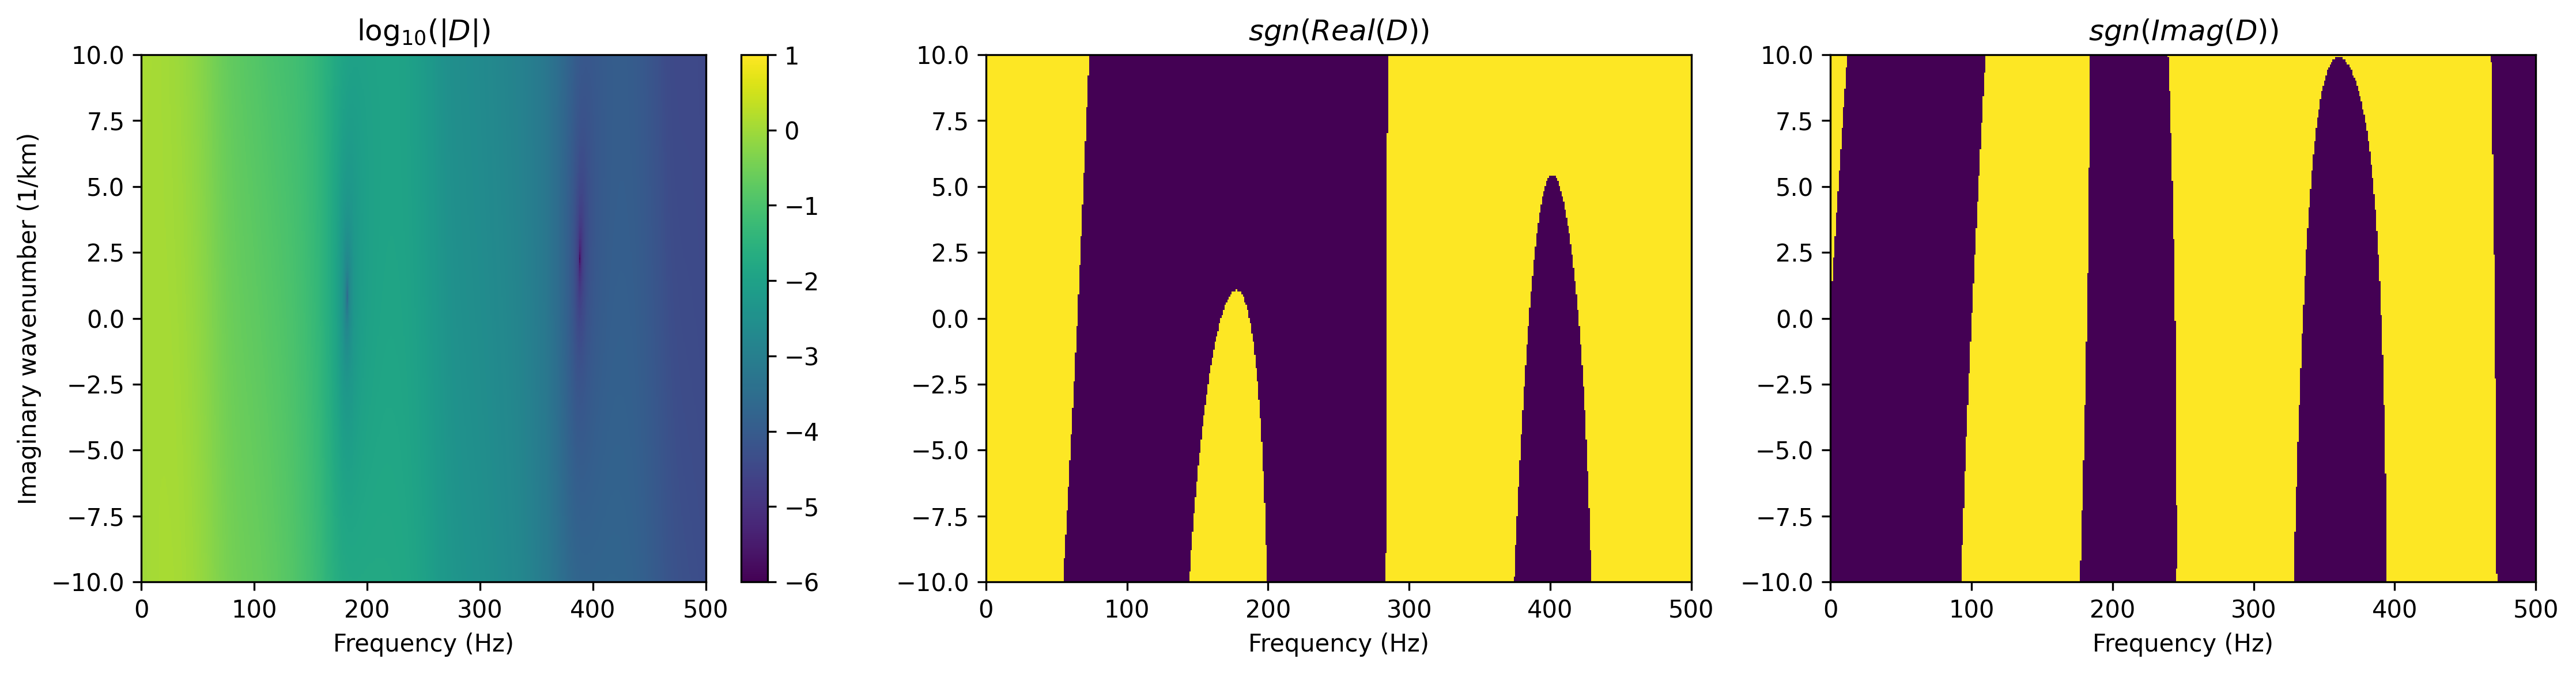

In [4]:
embedded_waves_map = embedded_waves_map1

fig=plt.figure(figsize=(15, 4),dpi=300)

plt.subplot(1,3,1)
vmin=-6
vmax=1
plt.imshow(np.log10(np.abs(embedded_waves_map)),interpolation='none',aspect="auto",extent=[fmin,fmax,kim_max,kim_min],vmin=vmin,vmax=vmax)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Imaginary wavenumber (1/km)")
plt.gca().invert_yaxis()
plt.colorbar()
plt.title(r"$\log_{10}(|D|)$")

plt.subplot(1,3,2)
plt.imshow(np.sign(np.real(embedded_waves_map)),interpolation='none',aspect="auto",extent=[fmin,fmax,kim_max,kim_min])
plt.xlabel("Frequency (Hz)")
# plt.ylabel("Imaginary wavenumber (1/km)")
plt.gca().invert_yaxis()
plt.title(r"$sgn(Real(D))$")

plt.subplot(1,3,3)
plt.imshow(np.sign(np.imag(embedded_waves_map)),interpolation='none',aspect="auto",extent=[fmin,fmax,kim_max,kim_min])
plt.xlabel("Frequency (Hz)")
# plt.ylabel("Imaginary wavenumber (1/km)")
plt.gca().invert_yaxis()
plt.title(r"$sgn(Imag(D))$")

plt.tight_layout()

plt.show()

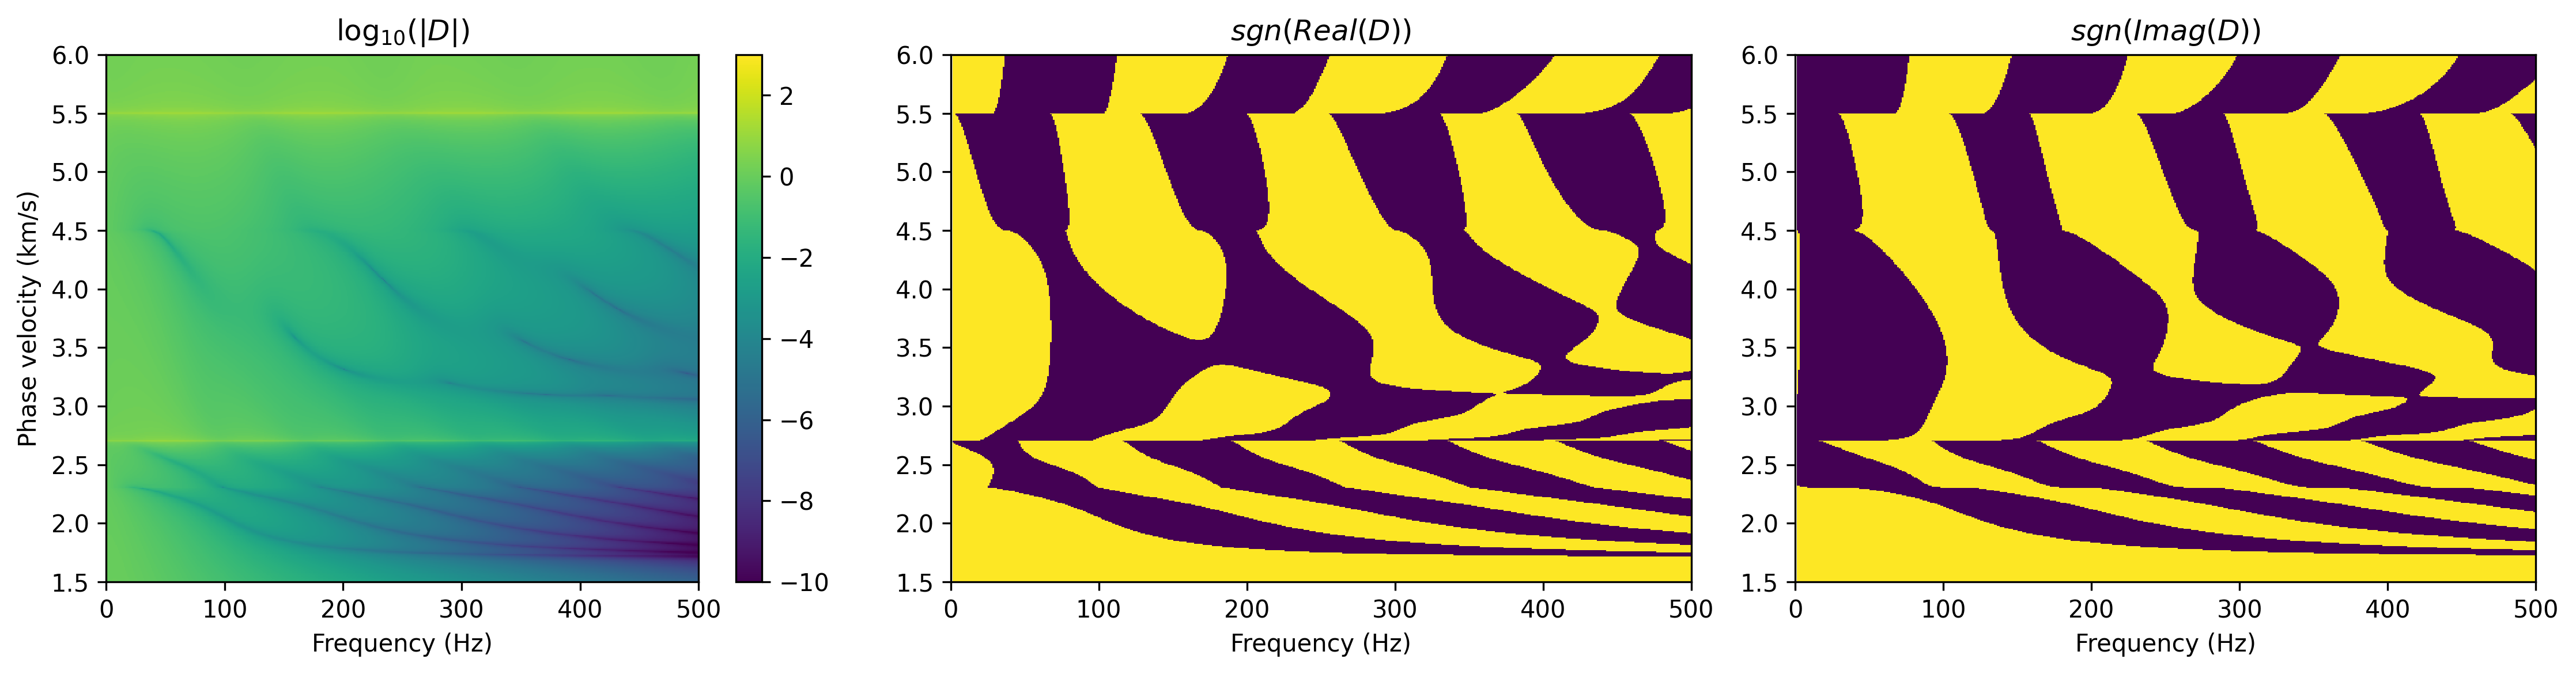

In [7]:
embedded_waves_map = embedded_waves_map2

fig=plt.figure(figsize=(15, 4),dpi=300)

plt.subplot(1,3,1)
vmin=-10
vmax=3
plt.imshow(np.log10(np.abs(embedded_waves_map)),interpolation='none',aspect="auto",extent=[fmin,fmax,cmax,cmin],vmin=vmin,vmax=vmax)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase velocity (km/s)")
plt.gca().invert_yaxis()
plt.colorbar()
plt.title(r"$\log_{10}(|D|)$")

plt.subplot(1,3,2)
plt.imshow(np.sign(np.real(embedded_waves_map)),interpolation='none',aspect="auto",extent=[fmin,fmax,cmax,cmin])
plt.xlabel("Frequency (Hz)")
# plt.ylabel("Phase velocity (km/s)")
plt.gca().invert_yaxis()
plt.title(r"$sgn(Real(D))$")

plt.subplot(1,3,3)
plt.imshow(np.sign(np.imag(embedded_waves_map)),interpolation='none',aspect="auto",extent=[fmin,fmax,cmax,cmin])
plt.xlabel("Frequency (Hz)")
# plt.ylabel("Phase velocity (km/s)")
plt.gca().invert_yaxis()
plt.title(r"$sgn(Imag(D))$")

plt.tight_layout()

plt.show()

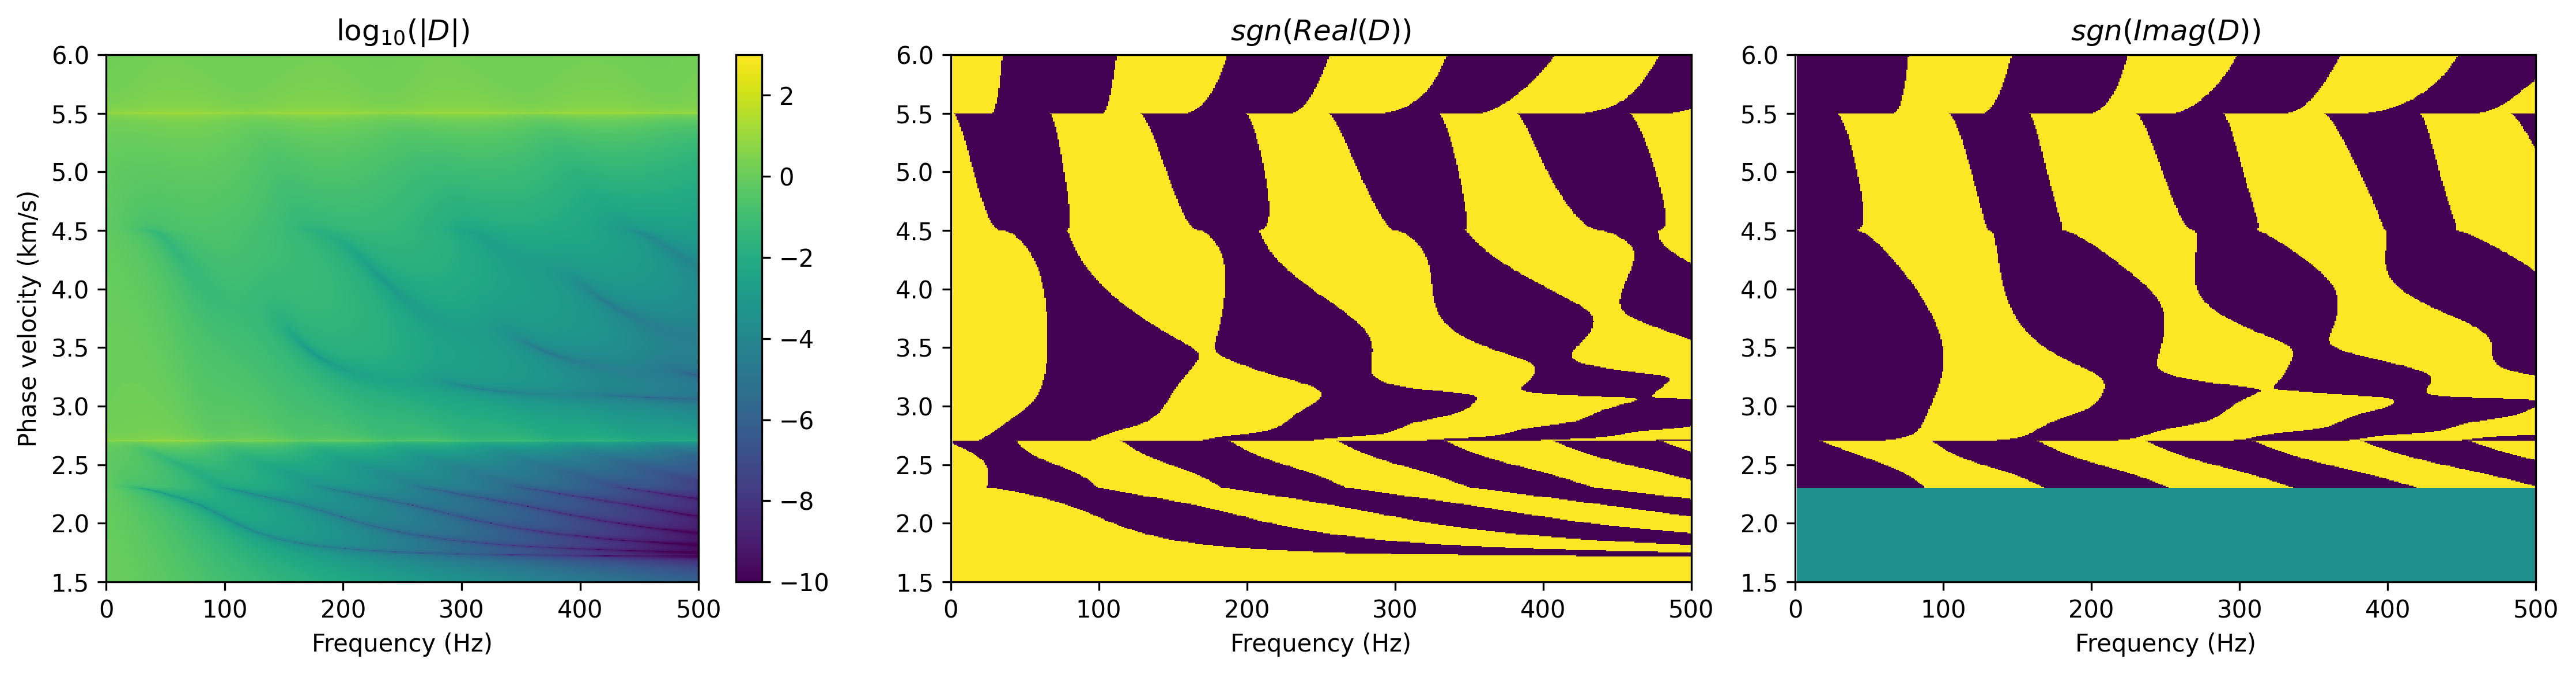

In [8]:
embedded_waves_map = embedded_waves_map3

fig=plt.figure(figsize=(15, 4),dpi=300)

plt.subplot(1,3,1)
vmin=-10
vmax=3
plt.imshow(np.log10(np.abs(embedded_waves_map)),interpolation='none',aspect="auto",extent=[fmin,fmax,cmax,cmin],vmin=vmin,vmax=vmax)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase velocity (km/s)")
plt.gca().invert_yaxis()
plt.colorbar()
plt.title(r"$\log_{10}(|D|)$")

plt.subplot(1,3,2)
plt.imshow(np.sign(np.real(embedded_waves_map)),interpolation='none',aspect="auto",extent=[fmin,fmax,cmax,cmin])
plt.xlabel("Frequency (Hz)")
# plt.ylabel("Phase velocity (km/s)")
plt.gca().invert_yaxis()
plt.title(r"$sgn(Real(D))$")

plt.subplot(1,3,3)
plt.imshow(np.sign(np.imag(embedded_waves_map)),interpolation='none',aspect="auto",extent=[fmin,fmax,cmax,cmin])
plt.xlabel("Frequency (Hz)")
# plt.ylabel("Phase velocity (km/s)")
plt.gca().invert_yaxis()
plt.title(r"$sgn(Imag(D))$")

plt.tight_layout()

plt.show()

### Compute all $f-c-k_{im}$ roots as scatter points

In [40]:
# define the size of the map
fmin=0 #frequeny (Hz)
fmax=500
nf=100
kim_min=0 # imaginary horizontal wavenumber (attenuation, 1/km).
kim_max=20
nk=100
cmin1=2.31 # phase velocity (km/s)
cmax1=4.5
nc1=50
df=(fmax-fmin)/(nf-1.)
dk=(kim_max-kim_min)/(nk-1.)

f=np.linspace(fmin,fmax,num=nf,dtype='float64')
kim=np.linspace(kim_min,kim_max,num=nk,dtype='float64')
c=np.linspace(cmin1,cmax1,num=nc1,dtype='float64')

max_nroots=1000
allroots = np.zeros((3,max_nroots)) # c-f-kim roots
counter = 0
i=0

for c0 in c:
    i+=1
    roots = leaky_roots(func=leaky, phase_velocity=c0, fmin=fmin, fmax=fmax, df=df, amin=kim_min, amax=kim_max, da=dk, nlayers=nlayers, vp=vp, vs=vs, density=rho, thickness=d)
    nr = roots[0,:].size
    allroots[0,counter:counter+nr] = roots[0,:]
    allroots[2,counter:counter+nr] = roots[1,:]
    allroots[1,counter:counter+nr] = c0
    counter += nr
    if ((i*100)/nc1)%10 == 0:
        print("Progress %d%%. Nb of roots: %d" %((i*100)/nc1,counter))

allroots = allroots[:,0:counter]

Progress 10%. Nb of roots: 23
Progress 20%. Nb of roots: 26
Progress 30%. Nb of roots: 26
Progress 40%. Nb of roots: 29
Progress 50%. Nb of roots: 39
Progress 60%. Nb of roots: 50
Progress 70%. Nb of roots: 66
Progress 80%. Nb of roots: 81
Progress 90%. Nb of roots: 95
Progress 100%. Nb of roots: 115


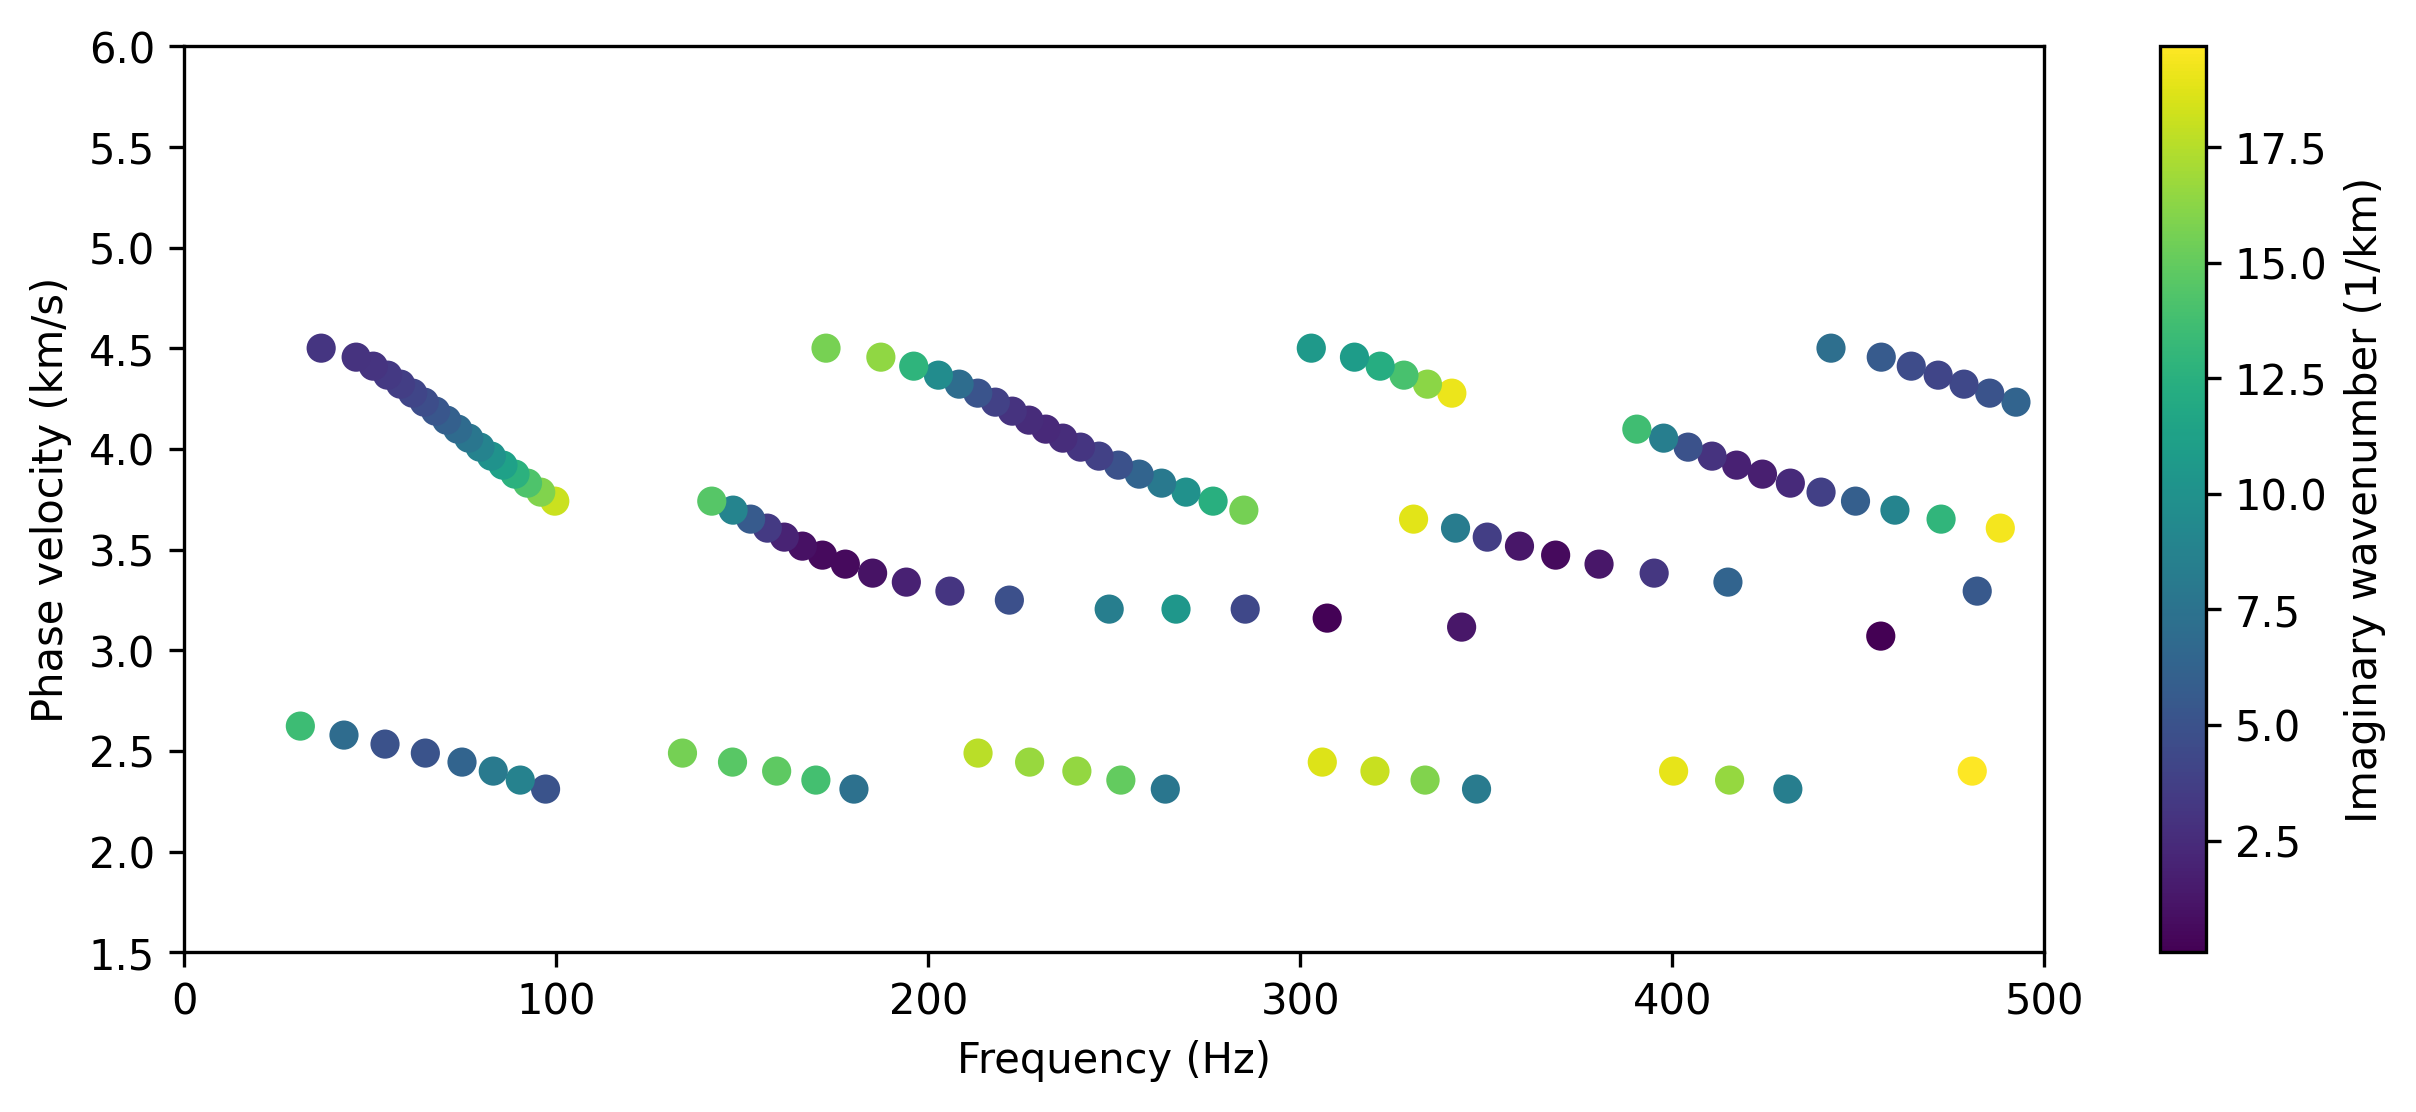

In [41]:
fig=plt.figure(figsize=(10, 4),dpi=300)


plt.scatter(allroots[0,:],allroots[1,:],c=allroots[2,:])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase velocity (km/s)")
plt.xlim(fmin, fmax)
plt.ylim(cmin,cmax)
# plt.colorbar(label="Attenuation (Nepers per unit distance)")
plt.colorbar(label="Imaginary wavenumber (1/km)")
plt.show()

### Trace $f-c-k_{im}$ dispersion curve starting from given roots 

In [78]:
c01=4.5
max_nroots=3
roots1 = leaky_roots(func=leaky, phase_velocity=c01, fmin=fmin,fmax=fmax, df=df, amin=kim_min, amax=2*kim_max, da=dk, nlayers=nlayers,vp=vp, vs=vs, density=rho, thickness=d)
nr1 = roots1[0,:].size
nr1 = min(nr1,max_nroots)

c02=2.5
max_nroots=3
roots2 = leaky_roots(func=leaky, phase_velocity=c02, fmin=fmin,fmax=fmax, df=df, amin=kim_min, amax=2*kim_max, da=dk, nlayers=nlayers,vp=vp, vs=vs, density=rho, thickness=d)
nr2 = roots2[0,:].size
nr2 = min(nr2,max_nroots)

nr=nr1+nr2

fca_curves=np.empty(nr1+nr2, dtype='object')
threshold=-1
for i in range(nr1):
    fca_roots=np.zeros(3)
    fca_roots[:]=[roots1[0,i],c01,roots1[1,i]]
    fca_curves[i] = leaky_dispersion_curve(leaky_abs, fca_roots,  fmax, df, threshold, nlayers, vp, vs, rho, d)

threshold=-1
for i in range(nr2):
    fca_roots=np.zeros(3)
    fca_roots[:]=[roots2[0,i],c02,roots2[1,i]]
    fca_curves[nr1+i] = leaky_dispersion_curve(leaky_abs, fca_roots,  fmax, df, threshold, nlayers, vp, vs, rho, d)

/usr/local/lib/python3.6/dist-packages/scipy/optimize/_minimize.py:534: RuntimeWarning: Method Nelder-Mead cannot handle constraints nor bounds.
  RuntimeWarning)


f = 102.561667
 final_simplex: (array([[ 2.29451500e+00, -1.13922886e-04],
       [ 2.29451509e+00, -1.78299654e-04],
       [ 2.29451502e+00, -1.05164762e-04]]), array([6.17087799e-08, 8.22575159e-08, 3.76139284e-07]))
           fun: 6.170877988399054e-08
       message: 'Optimization terminated successfully.'
          nfev: 119
           nit: 57
        status: 0
       success: True
             x: array([ 2.29451500e+00, -1.13922886e-04])
f = 186.018262
 final_simplex: (array([[ 2.29637892e+00, -2.22127150e-04],
       [ 2.29637893e+00, -1.70338516e-04],
       [ 2.29637890e+00, -1.73194176e-04]]), array([5.60633030e-09, 7.83186271e-09, 2.14244578e-08]))
           fun: 5.60633029682535e-09
       message: 'Optimization terminated successfully.'
          nfev: 108
           nit: 51
        status: 0
       success: True
             x: array([ 2.29637892e+00, -2.22127150e-04])
f = 285.622375
 final_simplex: (array([[ 1.86107123e+00, -5.45181965e-04],
       [ 1.86107124e+00, -

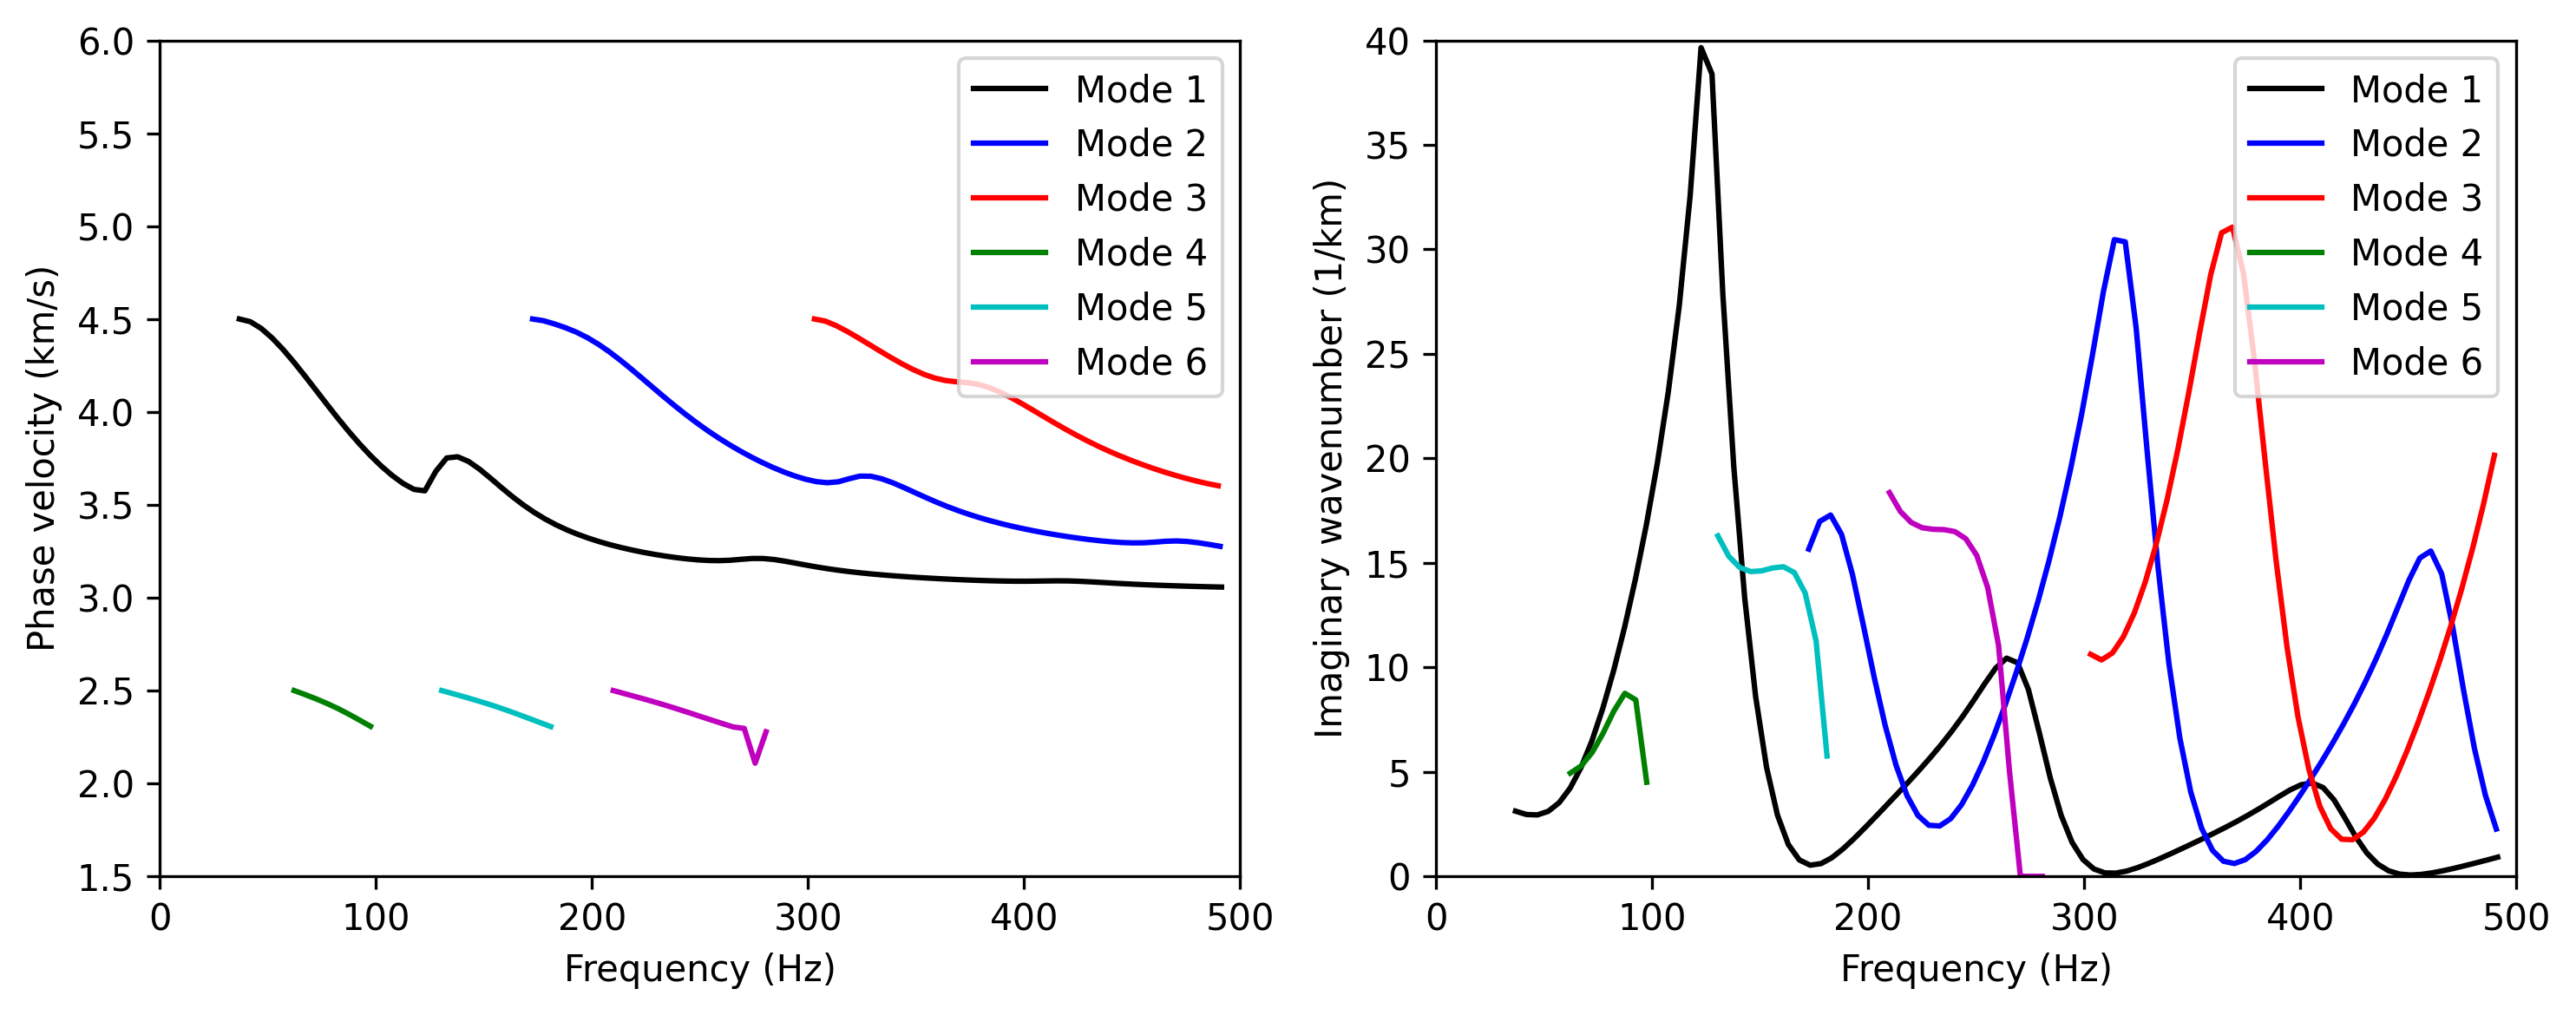

In [79]:
fig=plt.figure(figsize=(10, 4),dpi=300)

plt.subplot(1,2,1)

cf_curves=np.empty(nr, dtype='object')
mpl.rcParams['axes.prop_cycle'] = cycler(color='kbrgcmy')
for i in range(nr):
    cf_curves[i],=plt.plot(fca_curves[i][0,:],fca_curves[i][1,:])
    cf_curves[i].set_label("Mode "+str(i+1))

plt.legend(loc='best')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase velocity (km/s)")
plt.xlim(fmin, fmax)
plt.ylim(cmin,cmax)

plt.subplot(1,2,2)

af_curves=np.empty(nr, dtype='object')
for i in range(nr):
    af_curves[i],=plt.plot(fca_curves[i][0,:],fca_curves[i][2,:])
    af_curves[i].set_label("Mode "+str(i+1))

plt.legend(loc='best')
plt.xlabel("Frequency (Hz)")
# plt.ylabel("Attenuation (Nepers per unit distance)")
plt.ylabel("Imaginary wavenumber (1/km)")
plt.xlim(fmin, fmax)
plt.ylim(kim_min,2*kim_max)

plt.tight_layout()

plt.show()

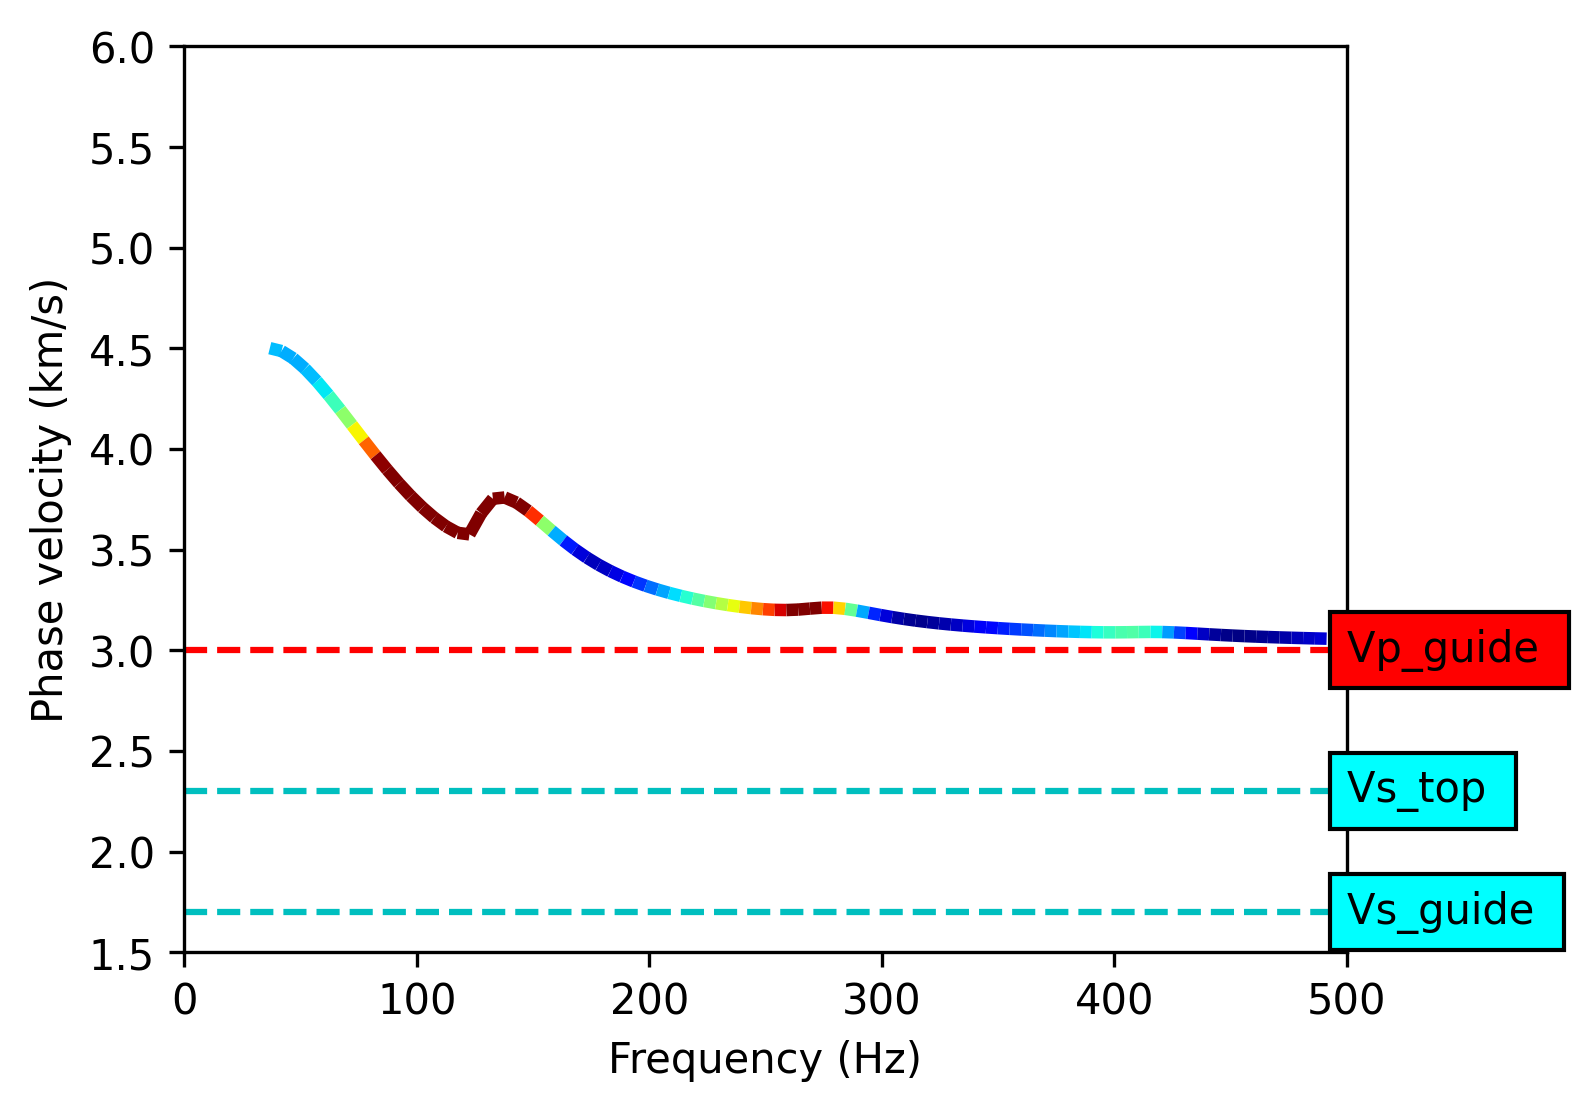

In [80]:
fig, ax = plt.subplots(figsize=(5, 4),dpi=300)

points = np.array([fca_curves[0][0,:], fca_curves[0][1,:]]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
lc = LineCollection(segments, cmap=plt.get_cmap('jet'),norm=plt.Normalize(0, 10))
lc.set_array(fca_curves[0][2,:])
lc.set_linewidth(3)
ax.add_collection(lc)
plt.xlim(fmin, fmax)
plt.ylim(cmin, cmax)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase velocity (km/s)")

plt.hlines(vs[0],xmin=fmin, xmax=fmax,colors='c',linestyles='dashed',label='Vs_top')
plt.hlines(vs[1],xmin=fmin, xmax=fmax,colors='c',linestyles='dashed',label='Vs_guide')
plt.hlines(vp[1],xmin=fmin, xmax=fmax,colors='r',linestyles='dashed',label='Vp_guide')

plt.text(fmax, vs[0], 'Vs_top ', bbox=dict(facecolor='cyan', alpha=1), ha='left', va='center')
plt.text(fmax, vs[1], 'Vs_guide ', bbox=dict(facecolor='cyan', alpha=1), ha='left', va='center')
plt.text(fmax, vp[1], 'Vp_guide ', bbox=dict(facecolor='red', alpha=1), ha='left', va='center')

plt.show()